# 5003HW8
#### Name: Li,Qichao
#### ID:20787264

## (a)Cleaning the data

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
Boston = pd.read_csv('boston_cleaning.txt',sep = '\s+',names = cols[:11])
left = Boston[Boston.index%2 == 0]
right = Boston[Boston.index%2 == 1]
left.reset_index(drop = True,inplace = True)
right = right.dropna(how = 'all',axis =1)
right.rename(columns = {"CRIM":cols[-3],"ZN":cols[-2],"INDUS":cols[-1]},inplace = True)
right.reset_index(drop = True,inplace = True)
Boston = pd.concat([left,right],axis = 1)

## A. Simple linear regression

#### (1) Calculate the regression of MEDV using LSTAT as the input

In [3]:
import scipy.stats as st

In [4]:
MEDV = np.array(Boston.MEDV)
LSTAT = np.array(Boston.LSTAT).reshape(-1,1)

In [5]:
reg = LinearRegression().fit(LSTAT,MEDV)
inter = reg.intercept_
beta = reg.coef_[0]
predict = reg.predict(LSTAT)
print("beta0 =",inter,"beta1 =",beta)

beta0 = 34.55384087938311 beta1 = -0.9500493537579909


#### (2) Plot the regression line together with the scattered data points

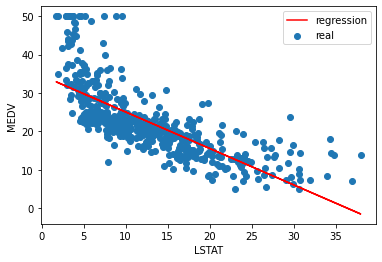

In [6]:
plt.scatter(LSTAT,MEDV,label = 'real')
plt.plot(LSTAT,predict,color = 'r',label = "regression")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.show()

#### (3) Calculate the 95% confidence interval of the coefficients

In [7]:
n = len(MEDV)
k = 1
sse = sum((MEDV-predict)**2)
sst = sum((MEDV-np.mean(MEDV))**2)
ssr = sum((predict-np.mean(MEDV))**2)
t_score = st.t.isf(0.05/2,df = n-k-1)
Se = np.sqrt(sse/(n-k-1))
lxx = np.sqrt(np.sum((LSTAT-np.mean(LSTAT))**2))

In [8]:
beta1_lower_cutoff = beta-t_score*Se/lxx
beta1_upper_cutoff = beta+t_score*Se/lxx
beta0_lower_cutoff = inter-t_score*Se*np.sqrt((np.mean(LSTAT)**2)/(lxx**2)+1/n)
beta0_upper_cutoff = inter+t_score*Se*np.sqrt((np.mean(LSTAT)**2)/(lxx**2)+1/n)
print(f"95% confidence interval of beta0:[{beta0_lower_cutoff},{beta0_upper_cutoff}]")
print(f"95% confidence interval of beta1:[{beta1_lower_cutoff},{beta1_upper_cutoff}]")

95% confidence interval of beta0:[33.44845704042267,35.65922471834355]
95% confidence interval of beta1:[-1.0261481995207606,-0.8739505079952211]


#### (4) If LSTAT = 4, 10, 14, what are the 95% confidence intervals of expected MEDV?

In [9]:
for x in [4,10,14]:
    lower_cutoff = inter+x*beta-t_score*Se*x/lxx
    upper_cutoff = inter+x*beta+t_score*Se*x/lxx
    print(f"If LSTAT = {x}, the 95% confidence intervals of expected MEDV is [{lower_cutoff},{upper_cutoff}]")

If LSTAT = 4, the 95% confidence intervals of expected MEDV is [30.449248081300066,31.058038847402226]
If LSTAT = 10, the 95% confidence intervals of expected MEDV is [24.292358884175503,25.814335799430896]
If LSTAT = 14, the 95% confidence intervals of expected MEDV is [20.18776608609246,22.318533767450013]


#### (5) If LSTAT = 4, 10, 14, what are the 95% prediction intervals of MEDV?

In [10]:
for x in [4,10,14]:
    lower_cutoff = inter+x*beta-t_score*Se*np.sqrt(1+x/lxx*x/lxx)
    upper_cutoff = inter+x*beta+t_score*Se*np.sqrt(1+x/lxx*x/lxx)
    print(f"If LSTAT = {x}, the 95% prediction intervals of MEDV is [{lower_cutoff},{upper_cutoff}]")

If LSTAT = 4, the 95% prediction intervals of MEDV is [18.53785777717688,42.96942915152541]
If LSTAT = 10, the 95% prediction intervals of MEDV is [12.817667269228918,37.28902741437748]
If LSTAT = 14, the 95% prediction intervals of MEDV is [8.994772948813337,33.51152690472914]


## B. Multiple linear regression

#### (1) Calculate the regression of MEDV using LSTAT and AGE as inputs

In [11]:
AGE = np.array(Boston.AGE).reshape(-1,1)

In [12]:
X = Boston[['LSTAT','AGE']]
reg = LinearRegression().fit(X,MEDV)
inter = reg.intercept_
beta1 = reg.coef_[0]
beta2 = reg.coef_[1]
predict = reg.predict(X)
print("beta0 =",inter,"beta1 =",beta1,"beta2 =",beta2)

beta0 = 33.2227605317929 beta1 = -1.032068564182601 beta2 = 0.03454433857164606


#### (1) Calculate $R^2$

In [13]:
sst = sum((MEDV-np.mean(MEDV))**2)
ssr = sum((predict-np.mean(MEDV))**2)
R_squared = ssr/sst
print("R-squared =",R_squared)

R-squared = 0.5512689379420992
